<a href="https://colab.research.google.com/github/suganthialagumalai/suganthialagumalai/blob/main/Brainvs_Body_WeightAssessment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("/content/brain_body.txt")

In [ ]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
print(df.shape)

(62, 2)


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


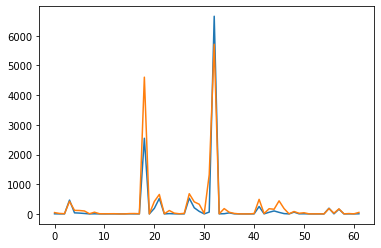

In [ ]:
plt.plot(df)

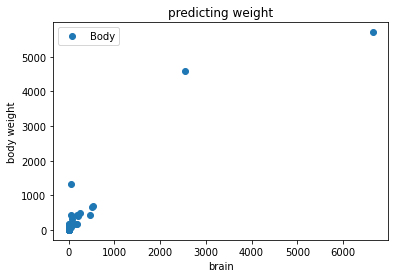

In [ ]:
df.plot(x='Brain', y='Body',style='o')
plt.xlabel('brain')
plt.ylabel('body weight')
plt.title('predicting weight')
plt.show()

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
df['logx'] = np.log(df['Body'])
df['logy'] = np.log(df['Brain'])

In [ ]:
df

,Brain,Body,logx,logy
0,3.385,44.5,3.795489,1.219354
1,0.480,15.5,2.740840,-0.733969
2,1.350,8.1,2.091864,0.300105
3,465.000,423.0,6.047372,6.142037
4,36.330,119.5,4.783316,3.592644
...,...,...,...,...
57,160.000,169.0,5.129899,5.075174
58,0.900,2.6,0.955511,-0.105361
59,1.620,11.4,2.433613,0.482426
60,0.104,2.5,0.916291,-2.263364


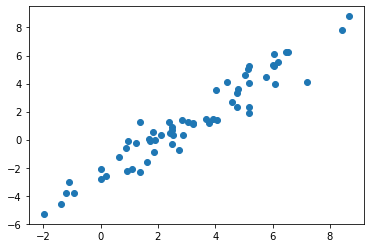

In [ ]:
plt.scatter(df['logx'],df['logy'])

In [ ]:
X = df.drop(['Brain','Body','logy'], axis = 1)
Y = df['logy']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 988)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
sc = RobustScaler()
sc.fit_transform(X_train)
sc.fit(X_test)

RobustScaler()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = lr.predict(X_test)

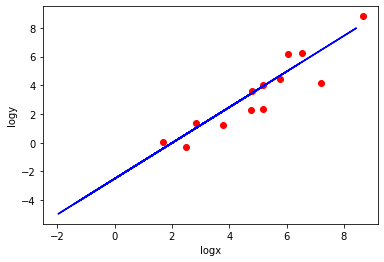

In [ ]:
plt.scatter(X_test, Y_test,color='red')
plt.plot(X_train, lr.predict(X_train), color= 'blue')
plt.xlabel('logx')
plt.ylabel('logy')
plt.show()

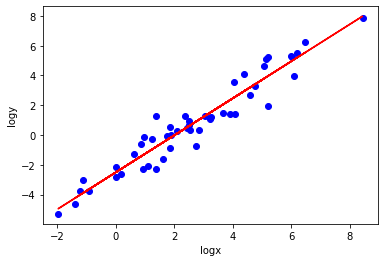

In [ ]:
plt.scatter(X_train, Y_train,color='blue')
plt.plot(X_train, lr.predict(X_train), color= 'red')
plt.xlabel('logx')
plt.ylabel('logy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score
lr.score(X_train,Y_train)

0.9223831903465844

In [ ]:
lr.score(X_test,Y_test)

0.8401943830695706

In [ ]:
print('R^2:',metrics.r2_score(Y_test, Y_pred))

R^2: 0.8401943830695706


In [ ]:
Y_pred = lr.predict(X_train)
print('R^2:',metrics.r2_score(Y_train, Y_pred))


R^2: 0.9223831903465844
